# Molecule Graph Representation

## Introduction

Machine Learning models designed for various tasks on molecules data, have been standing out for their impresive abilities these days.
By given molecules structures, there are two options to represent it as input of the model.
One is a sequence representation where atoms and bonds are summed up to one string line such as the format of "simplified molecular input line-entry system" (SMILES).
For example, Methan (CH3) as "C", Dimethyl ether (CH3OCH3) as "COC". 
The second option which is much more popular is graph representation.
In contrast to sequential representation, the molecule is represented as graph where each atom and bond is represented by a node and edge respectively.
That way, information regarding the spatial interaction between each atom is exploited  by the model which results in better performence (Guo et al., 2022).

Molecule graphs may be complex by introducing more specific information about the nodes and edges, e.g., in addition to atom type, nodes may have information regrading chirality (for 3D graphs) or hybridization; edges may have the bond type, stereochemistry etc (Guo et al., 2022).
However, we are going to be focused on the most simple graph representation where nodes are atom types and edges corresponds to any covalent bonds.

## Data

Following Guo et al. (2022) and Lim et al. (2018), we can first take molecule data stored as SMILE string.
We do so by using [ZINC](https://zinc.docking.org/) data set (Irwin et al., 2012).
From there, a dataset composed of nearly 30,000 exmaples was downloaded.
The data molecules are charcterized with molecular weight less than 200 dalton and $\log P$ up to -1 (hydrophobic behavior).
Moreover, only named molecules under FDA were selected.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Data/200d_-1_named+fda.csv')
data.head()

,zinc_id,smiles
0,ZINC000001530427,C[C@@H]1O[C@@H]1P(=O)(O)O
1,ZINC000003807804,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1
2,ZINC000000120286,Nc1nc(N)c2nc(-c3ccccc3)c(N)nc2n1
3,ZINC000000008492,Oc1cccc2cccnc12
4,ZINC000003607120,COc1c(N2CCN[C@H](C)C2)c(F)cc2c(=O)c(C(=O)O)cn(...


In [ ]:
from rdkit import Chem

### One molecule example

The top example with ZINC000001530427 id is Fosfomycin, an antibiotic used for bladder infections:

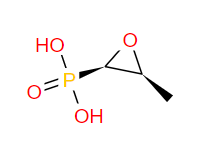

The phosphate group is denoted by P(=O)(O)O while the epoxypropyl group (the triangle) is C[C@@H]1O[C@@H]1 - configurations is specified by @ or @@.

Now you can use the `Chem.MolFromSmiles` function to create a rdchem object. When given to the kenel, it actually disply the molecule.

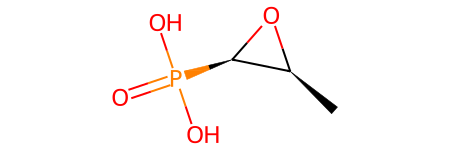

In [10]:
mol = Chem.MolFromSmiles(data['smiles'][0])
mol

Get the number of atoms in the conformer (not included hydrogen):

In [11]:
mol.GetNumAtoms()

8

Print all atoms in the molecule (according to atom number or symbol, not including hydrogen):

In [21]:
atom_labels = []
for atom in mol.GetAtoms():
    atom_labels.append(atom.GetSymbol())
    print(atom_labels[-1], ' - ',atom.GetAtomicNum())

C  -  6
C  -  6
O  -  8
C  -  6
P  -  15
O  -  8
O  -  8
O  -  8


Adjacency matrix:

In [23]:
mat = Chem.rdmolops.GetAdjacencyMatrix(mol)
mat

array([[0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0]], dtype=int32)

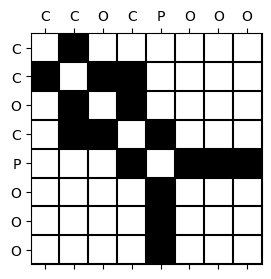

In [49]:
fig, axis = plt.subplots(figsize=(3, 3))
axis.matshow(mat, cmap='binary')
pos = np.arange(len(atom_labels))
axis.set_xticks(ticks=pos)
axis.set_yticks(ticks=pos)
axis.set_xticklabels(atom_labels)
axis.set_yticklabels(atom_labels)
lim = axis.get_xlim()
axis.vlines(pos+0.5, lim[0], lim[1], color='k')
axis.hlines(pos+0.5, lim[0], lim[1], color='k')

## Reference

Guo, Z., Nan, B., Tian, Y., Wiest, O., Zhang, C., & Chawla, N. V. (2022). Graph-based molecular representation learning. arXiv preprint arXiv:2207.04869.

Irwin, J. J., Sterling, T., Mysinger, M. M., Bolstad, E. S., & Coleman, R. G. (2012). ZINC: a free tool to discover chemistry for biology. Journal of chemical information and modeling, 52(7), 1757-1768.

Lim, J., Ryu, S., Kim, J. W., & Kim, W. Y. (2018). Molecular generative model based on conditional variational autoencoder for de novo molecular design. Journal of cheminformatics, 10(1), 1-9.

